In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import LogLocator

In [2]:
df = pd.read_csv('../training-process/hybrid/density/SCAN-320K/progress.out', sep='\\s+', skip_blank_lines=True, skiprows=[1])
iteration = np.array(df['iteration'])
loss_energy = np.array(df['le_avg'])
loss_force = np.array(df['lf_avg'])
loss_observable = np.array(df['lobs_avg'])
density = np.array(df['obs_mean'])
reweight_density = np.array(df['obs_term_avg'])

mean_density = np.mean(density)
mean_reweight_e = np.mean(reweight_density[-10000:])

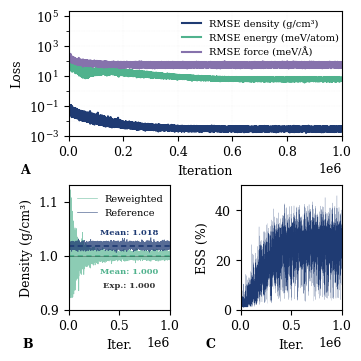

In [4]:
plt.rcParams.update({
    'font.size': 9, 'legend.fontsize': 7,
    "font.family": "serif",
    })

paletteFessa = [
    '#1F3B73', # dark-blue
    '#2F9294', # green-blue
    '#50B28D', # green
    "#5E9B51",
    '#A7D655', # pisello
    '#FFE03E', # yellow
    '#FFA955', # orange
    '#F4173B', # red
    '#8672AC',
]

# Create figure with grid 2x2
fig = plt.figure(figsize=(3.5, 3.5), constrained_layout=True)
gs = gridspec.GridSpec(2, 2, figure=fig, height_ratios=[1, 1], width_ratios=[1, 1], wspace=0)  # balanceado

# --- Loss ---
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(iteration, loss_observable, label='RMSE density (g/cm³)', color=paletteFessa[0])
ax1.plot(iteration, loss_energy*1000, label='RMSE energy (meV/atom)', color=paletteFessa[2])
ax1.plot(iteration, loss_force*1000, label='RMSE force (meV/Å)', color=paletteFessa[8])

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.set_xlim(0, iteration[-1])
ax1.set_ylim(1e-3, 2e5)
ax1.set_yscale('log')

ax1.legend(loc=(0.4, 0.6), ncol=1, frameon=False) 
ax1.yaxis.set_minor_locator(LogLocator(base=10.0, subs=[1], numticks=8))
ax1.grid(which='both', linestyle=(0, (8, 4)), linewidth=.1, alpha=0.4)
ax1.tick_params(axis='y', which='minor', labelleft=False)

# --- Density ---
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(iteration[::100], reweight_density[::100], color=paletteFessa[2], label='Reweighted', alpha=0.66, linewidth=0.5, zorder=0)
ax2.plot(iteration[::100], density[::100], color=paletteFessa[0], label='Reference', alpha=0.75, linewidth=0.5)

ax2.hlines(mean_density, xmin=iteration[0], xmax=iteration[-1], color=paletteFessa[0], linestyle=(0, (3, 2)), alpha=1, linewidth=1.25)
ax2.hlines(mean_reweight_e, xmin=iteration[0], xmax=iteration[-1], color=paletteFessa[2], linestyle=(0, (3, 2)), alpha=1, linewidth=1.25, zorder=1)
ax2.hlines(1., xmin=iteration[0], xmax=iteration[-1], color="black", alpha=0.5, linewidth=0.4, zorder=2)

ax2.text(600000, mean_density+0.025, f'Mean: {mean_density:.3f}', va='center', ha='center', color=paletteFessa[0], fontweight='bold', fontsize=6)
ax2.text(600000, mean_reweight_e-0.03, f'Mean: {mean_reweight_e:.3f}', va='center', ha='center', color=paletteFessa[2], fontweight='bold', fontsize=6)
ax2.text(600000, 1.-0.055, f'Exp.: {1.0:.3f}', va='center', ha='center', color="black", fontweight='bold', fontsize=6, alpha=0.8)

ax2.set_xlabel('Iter.')
ax2.set_ylabel('Density (g/cm³)')
ax2.set_xlim(0, iteration[-1])
ax2.set_ylim(0.9, 1.13)
ax2.legend(loc='best', ncol=1, frameon=False)

# --- ESS ---
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(iteration[::250], df['ESS'][::250], color=paletteFessa[0], linewidth=0.1, label='ESS')

ax3.set_xlabel('Iter.')
ax3.set_ylabel('ESS (%)')
ax3.set_xlim(0, iteration[-1])
ax3.set_ylim(0, 50)

# --- Labels ---
ax1.text(-0.14, -0.22, 'A', transform=ax1.transAxes,
         fontsize=9, va='top', ha='right', weight='bold')

ax2.text(-0.35, -0.22, 'B', transform=ax2.transAxes,
         fontsize=9, va='top', ha='right', weight='bold')

ax3.text(-0.25, -0.22, 'C', transform=ax3.transAxes,
         fontsize=9, va='top', ha='right', weight='bold')

plt.show()